In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import anderson
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
data = pd.read_csv(r"/Users/shubhantamhane/Desktop/Python/DataSets/2023_nba_player_stats.csv") #loading in data

In [ ]:
data.head(5)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [ ]:
data.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,student
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,25.981273,48.473783,24.234082,24.239700,1113.872097,528.327715,193.370787,406.762172,46.758989,56.852060,...,116.621723,61.870787,33.576779,21.440075,92.026217,1046.601124,4.048689,0.222846,0.014981,0.000190
std,4.322334,24.353600,14.390802,13.318252,824.781963,497.816349,178.213527,369.267397,10.054317,60.955976,...,129.703411,58.251188,28.291048,26.573117,65.934979,892.635107,8.803327,1.571606,148.917053,1.002597
min,19.000000,1.000000,0.000000,0.000000,2.100000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-642.000000,-4.318077
25%,23.000000,31.000000,13.000000,14.000000,343.100000,122.500000,47.000000,99.500000,41.725000,5.000000,...,23.000000,15.000000,9.000000,5.000000,33.000000,278.500000,0.000000,0.000000,-70.000000,-0.323457
50%,25.000000,55.000000,25.000000,25.500000,984.050000,381.000000,140.000000,305.500000,45.550000,37.000000,...,69.000000,44.500000,28.000000,13.000000,87.500000,833.500000,0.000000,0.000000,-7.500000,0.102294
75%,29.000000,68.000000,36.000000,34.000000,1857.000000,779.750000,284.000000,602.000000,50.750000,92.750000,...,163.000000,93.000000,51.750000,28.750000,140.750000,1655.750000,3.000000,0.000000,57.000000,0.283607
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000,6.017863


In [ ]:
data.shape

(534, 31)

In [ ]:
data.isna().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [ ]:
data.dropna(inplace = True) #fixing null values

Text(0.5, 1.0, 'Heatmap of all Predictors')

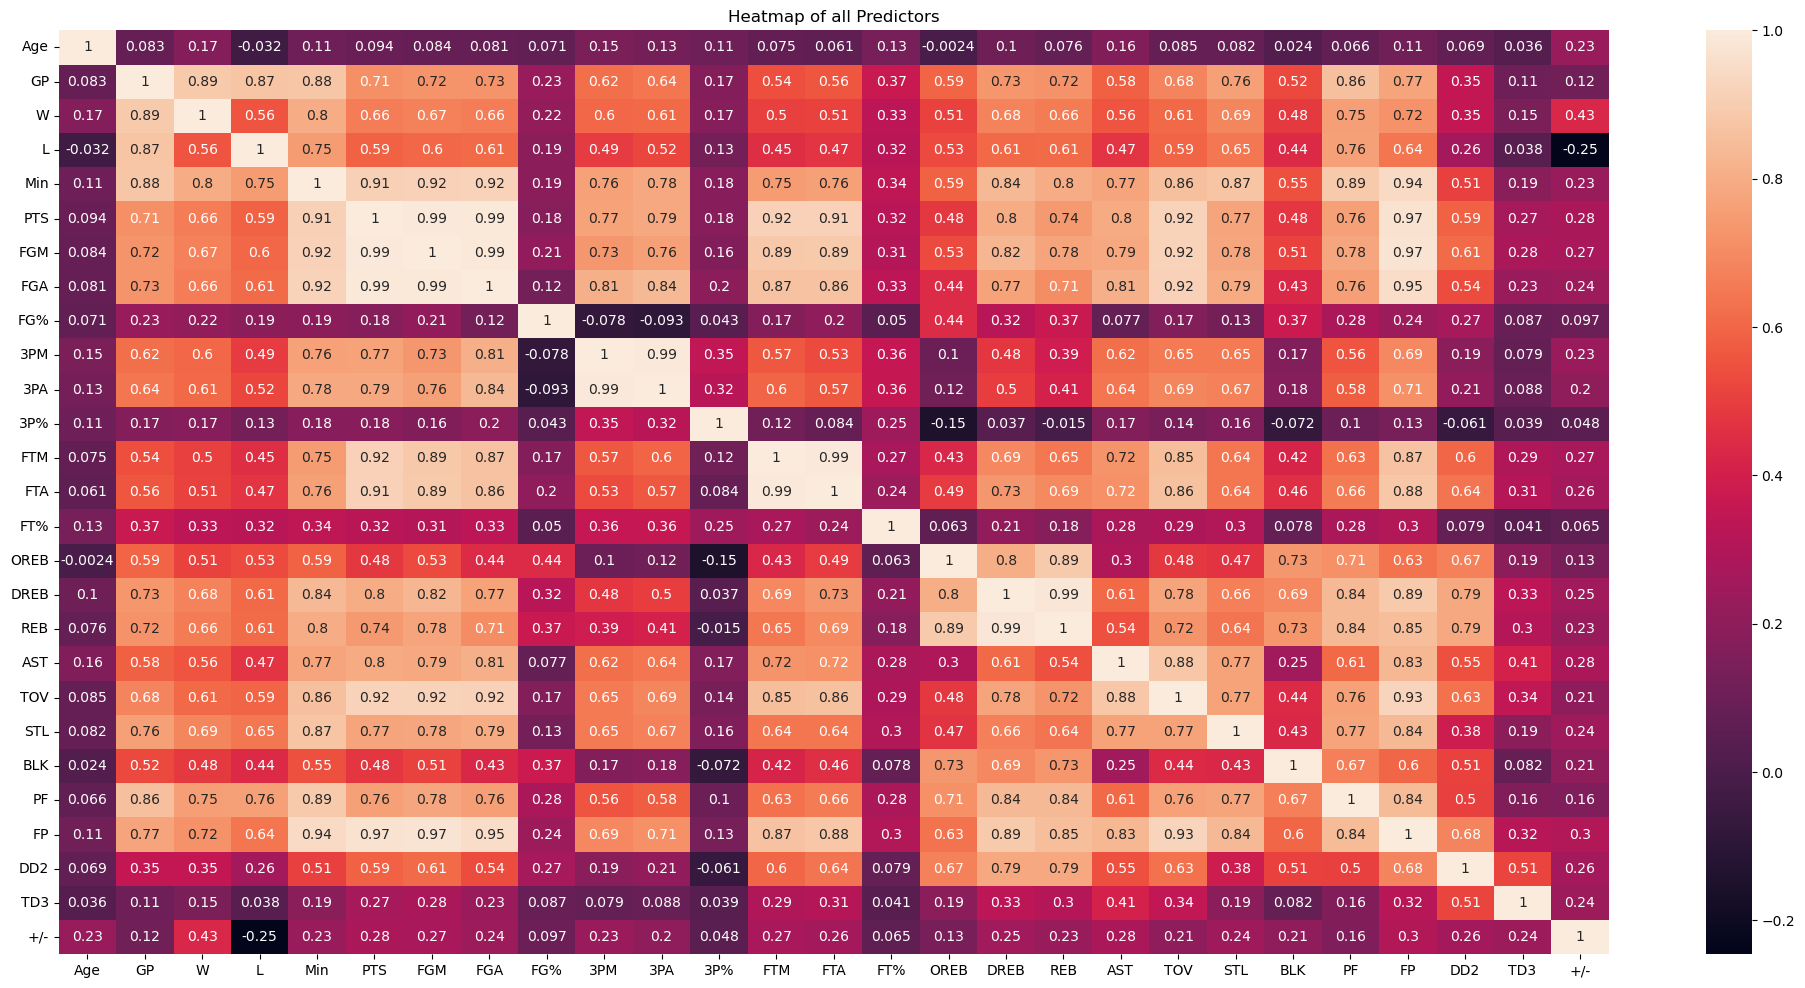

In [ ]:
plt.figure(figsize= (25,12)) #heatmap to analyze predictors
sns.heatmap(data.corr(numeric_only = True), annot = True)
plt.title("Heatmap of all Predictors")

From the heatmap seen above, I wanted to choose a single predictor for the target variable points, as this was the scope of the project. Since "FGM", field goals made, has the highest correlation with the target variable, this was the the predictor I chose.

In [ ]:
selected = ['FGM', 'PTS'] #making dataframe of target variable and single predictor
simple_data = data[selected]

In [ ]:
simple_data.head()

,FGM,PTS
0,727,2225
1,728,2183
2,719,2138
3,704,2135
4,707,1959


In [ ]:
simple_data.shape

(534, 3)

In [ ]:
simple_data.describe()

,FGM,PTS,student
count,534.000000,534.000000,534.000000
mean,193.370787,528.327715,0.000190
std,178.213527,497.816349,1.002597
min,0.000000,2.000000,-4.318077
25%,47.000000,122.500000,-0.323457
50%,140.000000,381.000000,0.102294
75%,284.000000,779.750000,0.283607
max,728.000000,2225.000000,6.017863


# Checking of Assumptions

## Linearity

Text(0.5, 1.0, 'Scatterplot of FGM and PTS')

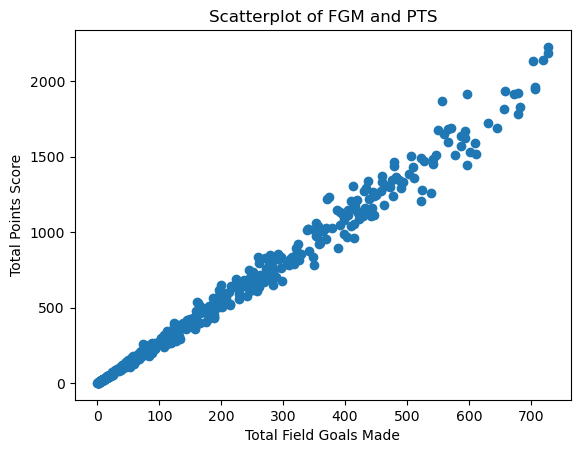

In [ ]:
plt.scatter(x = 'FGM', y = 'PTS',data = simple_data)
plt.xlabel("Total Field Goals Made")
plt.ylabel("Total Points Score")
plt.title("Scatterplot of FGM and PTS")

Looking at the scatterplot above, we see that the points seem to somewhat follow the shape of a line, one with positive slope. Because of this, the condition of linearity seems to be satisfied.

Fitting linear model to calculate studentized residuals, as this is needed for testing further assumptions

In [ ]:
x = data['FGM']
y = data['PTS']
model = smf.ols("y ~ x", data=simple_data).fit()
influence = model.get_influence()
studentized_residuals = influence.resid_studentized_internal
simple_data.loc[:, 'student'] = studentized_residuals #adding residuals column to simple_data dataframe

## Normality of Errors

In [ ]:
result = anderson(simple_data['student'], dist='norm')
print(f"P-Values: {result.critical_values[2]}") #p-value for significance level: 0.05

P-Values: 0.781


Test for Normality of errors using Anderson-Darling Test.

H0: Errors follow a normal distribution

HA: Errors do not follow a normal distribution

Since the outputed p-value of 0.781, is higher than the chosen signifiance value of 0.05, we fail to reject the null hypothesis. Therefore, we have sufficient evidence to conclude that the errors follow a normal distribution.

## Constant Variance

In [ ]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"p-value: {bp_test[1]}")

p-value: 1.2928747438706569e-27


Test for constant variance using Breusch-Pagan Test

H0: Constant variance

HA: Nonconstant variance

Since the outputed p-value of 1.29e-27 is less than the signifance value of 0.05, we reject H0. Therefore, we can conclude that the data does not have constant variance. Since this condition fails, we can perform some transformations.

In [ ]:
x = simple_data['FGM']
y = simple_data['PTS']**(1/2) #applying square root transformation to target variable
model = smf.ols("y ~ x", data=simple_data).fit()
influence = model.get_influence()
studentized_residuals = influence.resid_studentized_internal
simple_data.loc[:, 'student'] = studentized_residuals

## Linearity

Text(0.5, 1.0, 'Scatterplot of FGM and PTS')

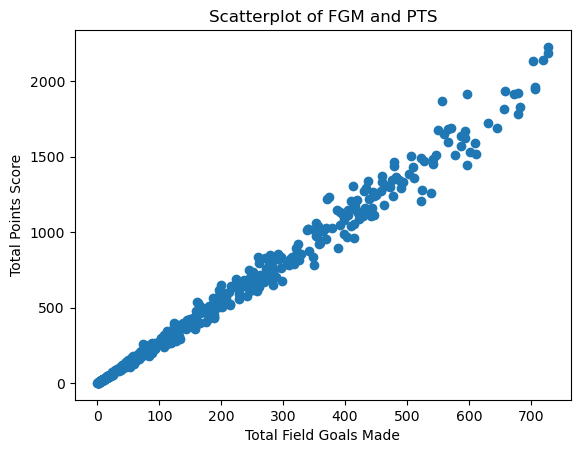

In [ ]:
plt.scatter(x = 'FGM', y = 'PTS',data = simple_data)
plt.xlabel("Total Field Goals Made")
plt.ylabel("Total Points Score")
plt.title("Scatterplot of FGM and PTS")

Looking at the scatterplot above, we see that the points seem to somewhat follow the shape of a line, one with positive slope. Because of this, the condition of linearity seems to be satisfied.

## Normality of Errors

In [ ]:
result = anderson(simple_data['student'], dist='norm')
print(f"P-Values: {result.critical_values[2]}") #p-value for significance level: 0.05

P-Values: 0.781


Test for Normality of errors using Anderson-Darling Test.

H0: Errors follow a normal distribution

HA: Errors do not follow a normal distribution

Since the outputed p-value of 0.781, is higher than the chosen signifiance value of 0.05, we fail to reject the null hypothesis. Therefore, we have sufficient evidence to conclude that the errors follow a normal distribution.

## Constant Variance

In [ ]:
bp_test = het_breuschpagan(simple_data['student'], model.model.exog)
print(f"p-value: {bp_test[1]}")

p-value: 0.3008830282405665


Test for constant variance using Breusch-Pagan Test

H0: Constant variance

HA: Nonconstant variance

Since the outputed p-value of 0.3 is higher than the chosen signifiance value of 0.05, we fail to reject the null hypothesis. Therefore, we have sufficient evidence to conclude the the data has constant varuance.

Since all conditions have been verified, we can move to splitting and fitting the data.

In [ ]:
x_simple = simple_data[['FGM']]
y_simple = simple_data[['PTS']]
x_train, x_test, y_train, y_test = train_test_split(x_simple, y_simple, test_size = 0.2)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

Calculating R^2 value

In [ ]:
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.9887861365227528

Calculating MSE

In [ ]:
print("Mean Squared Error:",  mean_squared_error(y_test, y_pred))
print("Variance:",np.var(y_test) )

Mean Squared Error: 2929.805194643702
Variance: PTS    261266.351297
dtype: float64


/opt/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Since the MSE is low in comparison to the variance of the model and the r^2 value is very high, the simple regression model of field goals made seems to be good at explaining the variablity in the data and predicting points.